In [29]:
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import astropy.units as u
import pickle, json, warnings, astropy, os
from matplotlib.colors import LogNorm
from astropy.io.votable import parse
import mosaic_tools as mt
%matplotlib inline

# Plotting Tool

In [30]:
PT = mt.PlottingTools()

def plotstuff(ax,x,y,xlabel,ylabel,marker,markersize,color,linestyle='none',linewidth=0,**kw):

    ax.plot(x,y,marker=marker,ms=markersize,color=color,ls=linestyle,lw=linewidth,**kw)
    ax.set_xlabel('%s'%xlabel,fontsize=20)
    ax.set_ylabel('%s'%ylabel,fontsize=20)
    return ax

## Load Completeness and Simulation Results

In [20]:
baseFolder = '/Users/rpatel/Dropbox/Research/WFIRST/EXOSIMSTesting/'
resultFolder = os.path.join(baseFolder,'SimResults')
scriptFolder = os.path.join(baseFolder,'scripts')
compFolder = os.path.join(baseFolder,'Completeness')
# ===============  LOAD JSON SCRIPT FILE =================

# jfile = 'template_WFIRST_KeplerLike.json'
# jfile = 'template_WFIRST_EarthTwinHabZone.json'
# jfile = 'template_WFIRST_KnownRV.json'

jfile = 'template_rpateltest_KnownRV.json'
scriptfile = os.path.join(scriptFolder,jfile)
script = open(scriptfile).read()
specs_from_file = json.loads(script)

# ===============  LOAD COMPLETENESS FILE ===============

# cfile = 'EarthTwinHabZone2.comp'
# cfile = 'KeplerLike1.comp'
cfile = 'KnownRVPlanets_2yrs_5E+07stars_rpateltest.comp'
fle = os.path.join(compFolder,cfile)
dataCOMP = pickle.load(open(fle,'rb'))

# ===============  LOAD SIMULATION RESULTS ===============

simresults = 'simresults_2yrs_5E+07stars_rpateltest_KnownRV.pickle'
basesim =  simresults.strip('simresults_').strip('.pickle')

simfile = os.path.join(resultFolder,simresults)
simr = pickle.load(open(simfile,'rb'))

print 'Upper level keys: \n\t', simr.keys()

Upper level keys: 
	['star_prop', 'DRM', 'synplanet_prop', 'etc_data', 'empplanet_prop', 'AllSpecs']


In [19]:
plt.figure(figsize=(10,10))
plt.imshow(dataCOMP[0:600,0:160] + 1,cmap='viridis',norm=LogNorm())
plt.colorbar()
#plt.clim(1.7,2)

## Stellar Data

In [23]:
sp = simr['star_prop']
print 'Star property keys: \n\t', sp.keys()

Star property keys: 
	['Bmag', 'dist', 'maxintTime', 'BV', 'Binary_Cut', 'Spec', 'rv', 'Vmag', 'Imag', 'Kmag', 'Lum', 'pmdec', 'MsEst', 'Name', 'nStars', 'Jmag', 'Hmag', 'parx', 'MsTrue', 'Umag', 'comp0', 'MV', 'coords', 'pmra']


## Simulated Planet Data

In [24]:
pd_s = simr['synplanet_prop']
if pd_s is not None:
    print 'Simulated Planet property keys: \n\t', pd_s.keys()
else: print 'No simulated planets from this simulation'

No simulated planets from this simulation


## Empirical Planet Data

In [25]:
pd_e = simr['empplanet_prop']
if pd_e is not None:
    print 'Empirical Planet property keys: \n\t', pd_e.keys()
else: print 'No empirical planets from this simulation'

Empirical Planet property keys: 
	['Rp', 'I', 'fEZ', 'v', 'sInds', 'O', 'p', 'r', 'Mp', 'w', 'nplans', 'e', 'plan2star', 'sma']


## DRM and Specs of simulation

In [26]:
DRM = simr['DRM']
AllSpecs = simr['AllSpecs']

In [98]:
AllSpecs

{'FAP': 3e-05,
 'IWA': 0.0,
 'Irange': array([   0.,  180.]),
 'MDP': 0.001,
 'Mprange': array([  1.00000000e+00,   4.13100000e+03]),
 'Ndark': 10.0,
 'Npix': 14.3,
 'OWA': inf,
 'Orange': array([   0.,  360.]),
 'Rprange': array([  1. ,  22.6]),
 'SNchar': 11.0,
 'SNimag': 5.0,
 'arange': array([   0.1,  100. ]),
 'attenuation': 0.6,
 'coMass': 5800.0,
 'constrainOrbits': False,
 'currentTimeAbs': 60634.0,
 'currentTimeNorm': 0.0,
 'dMagLim': 20.0,
 'defburnPortion': 0.05,
 'dryMass': 3400.0,
 'dtAlloc': 1.0,
 'duration': 14.0,
 'erange': array([ 0.01,  0.99]),
 'eta': 0.1,
 'extendedLife': 0.0,
 'haveOcculter': False,
 'havejplephem': True,
 'intCutoff': 50.0,
 'keepStarCatalog': False,
 'magEZ': 22.0,
 'magZ': 23.0,
 'minComp': 0.1,
 'missionFinishAbs': 61364.5,
 'missionFinishNorm': 730.5,
 'missionLife': 2.0,
 'missionPortion': 0.16666666666666666,
 'missionStart': 60634.0,
 'modules': {'BackgroundSources': 'GalaxiesFaintStars',
  'Completeness': 'BrownCompleteness',
  'Observator

In [87]:
Mprange = AllSpecs['Mprange']
arange = AllSpecs['arange']

# indices of targets observed in order including repeats
target_obsind = np.array([dt['target_ind'] for dt in DRM])

# indices of all planets detected for each star.
try: 
    detind_pl = np.array([list(dt['plan_inds']) for dt in DRM])
    detind_plc = np.concatenate(detind_pl).astype('int32')
except: print 'No planets detected?'

#arrival time array
arrival_time = np.array([dt['arrival_time'] for dt in DRM])

# angular distance of each detection ? mas
#det_wa = np.array([dt['det_WA'] for dt in DRM])

# status of any detections
det_status = np.array([dt['det_status'] for dt in DRM])

# detection of planets

target_observed = sp['Name'][target_obsind]
detstatus_array = np.array([ dt['det_status'] for dt in DRM])

## Target Plots

### Red circles are targets that were observed

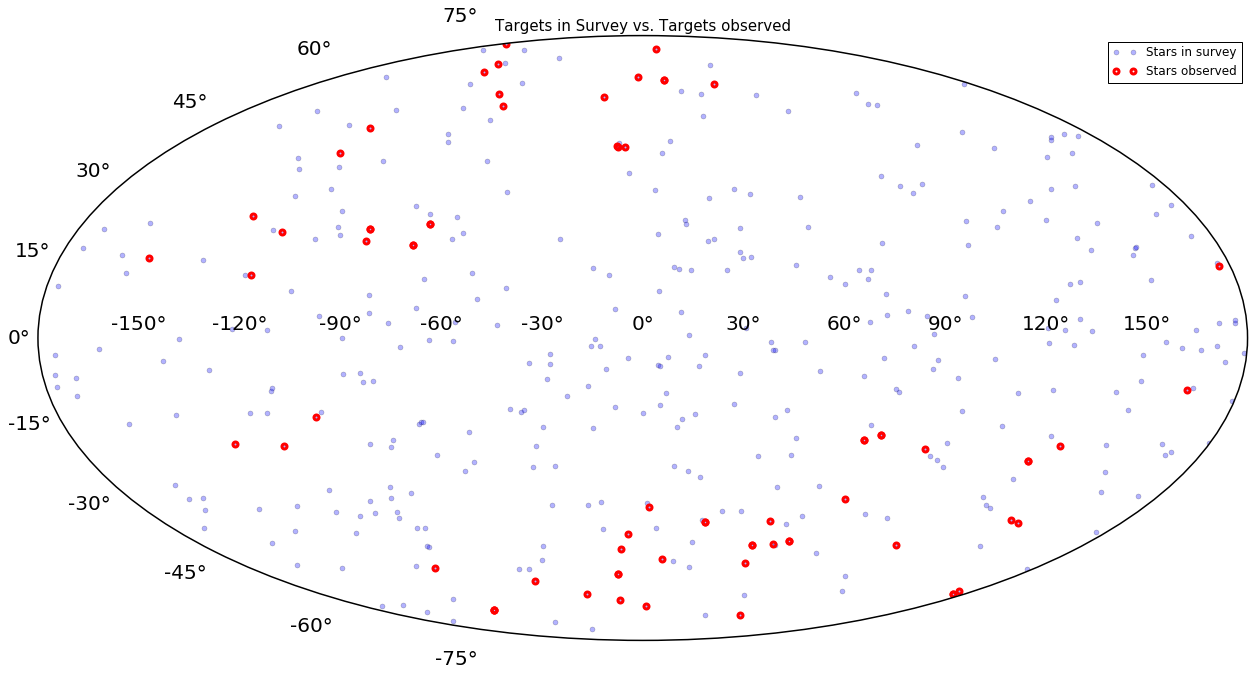

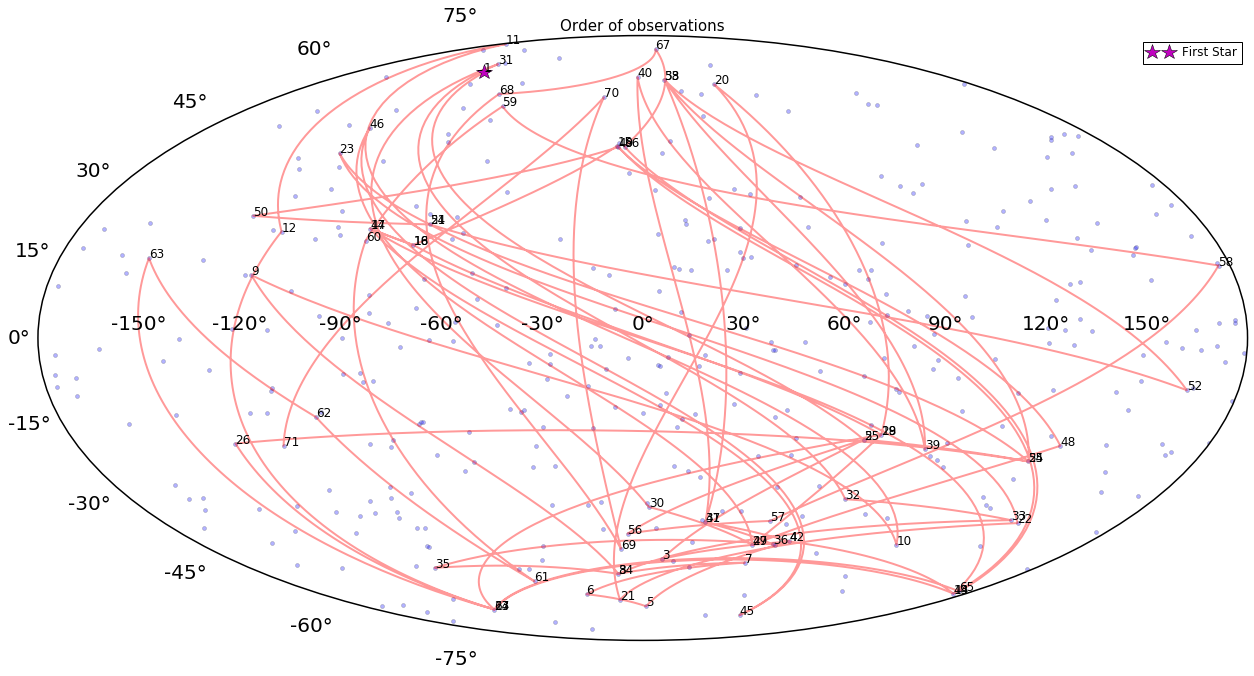

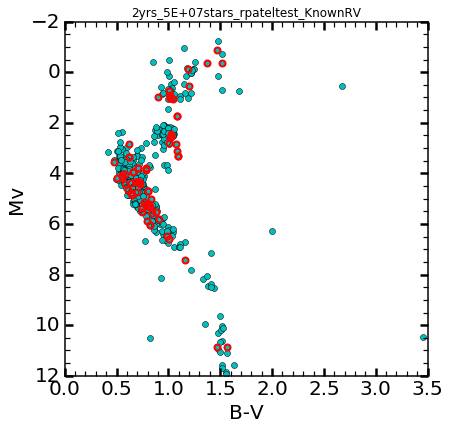

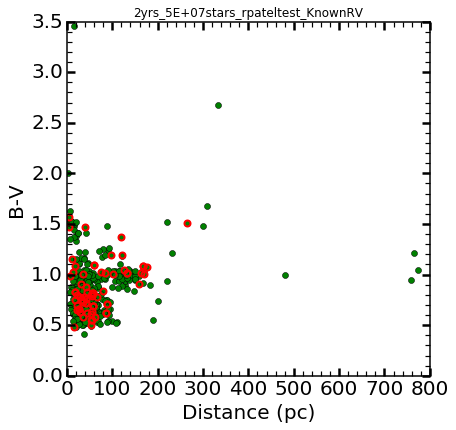

In [97]:
# SKY DISTRIBUTION OF TARGETS
save_plots = False
dirsave = os.path.join(baseFolder,'SimPlots')

coords = sp['coords']
ra_rad, dec_rad = coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian
BV, MV = sp['BV'], sp['MV']
dist = sp['dist']

# ==================================================================================================================
# ==================================================================================================================
axt = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt)
axt.plot(ra_rad,dec_rad,'o',ms=5,alpha=0.3,label='Stars in survey')
axt.plot(ra_rad[target_obsind],dec_rad[target_obsind],'ro',ms=5,mfc='none',mec='r',mew=3,label='Stars observed')
#axt.set_title('Targets in Survey vs. Targets observed; %s' %basesim)    
axt.set_title('Targets in Survey vs. Targets observed',fontsize=15)
plt.legend()
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_%s.png'%basesim))

# ==================================================================================================================
#         Observation Order
# ==================================================================================================================
axt2 = plt.figure(figsize=(20,20)).add_subplot(111,projection='aitoff')
PT.plot_setup(axt2)
axt2.plot(ra_rad,dec_rad,'bo',ms=4,alpha=0.3)
axt2.plot(ra_rad[target_obsind],dec_rad[target_obsind],'r-',mew=2,lw=2,alpha=0.4)

for i,j in enumerate(target_obsind):
    if i == 0:
        axt2.plot(ra_rad[j],dec_rad[j],'m*',ms=16,label='First Star')
    axt2.text(ra_rad[j],dec_rad[j],str(i+1),color='k',fontsize=12)
plt.title('Order of observations',fontsize=15)    
if save_plots: plt.savefig(os.path.join(dirsave,'sky_targets_order_%s.png'%basesim))
plt.legend()

# ==================================================================================================================
#         CMD
# ==================================================================================================================

axbv = plt.figure(figsize=(6,6)).add_subplot(111)
PT.plot_setup(axbv)
axbv = plotstuff(axbv,BV,MV,'B-V','Mv',marker='o',color='c',markersize=6)
axbv.plot(BV[target_obsind],MV[target_obsind],'ro',markersize=6,mfc='none',mec='r',mew=2)
axbv.set_ylim(axbv.get_ylim()[::-1])
axbv.set_title('%s' %basesim)          
if save_plots: plt.savefig(os.path.join(dirsave,'target_CMD_%s.png'%basesim))

# ==================================================================================================================
#            DISTANCE VS. B-V
# ==================================================================================================================
    
    

axbvd = plt.figure(figsize=(6,6)).add_subplot(111)
PT.plot_setup(axbvd)
axbvd = plotstuff(axbvd,dist,BV,'Distance (pc)','B-V',marker='o',color='g',markersize=6)
axbvd.plot(dist[target_obsind],BV[target_obsind],'ro',ms=6,mfc='none',mec='r',mew=2)
axbvd.set_title('%s'%basesim)
if save_plots: plt.savefig(os.path.join(dirsave,'target_dist_v_B-V_%s.png'%basesim))


## Planet Plots

In [105]:
(Mp/Mj).max()

<Quantity 27.011095691253953 kg>

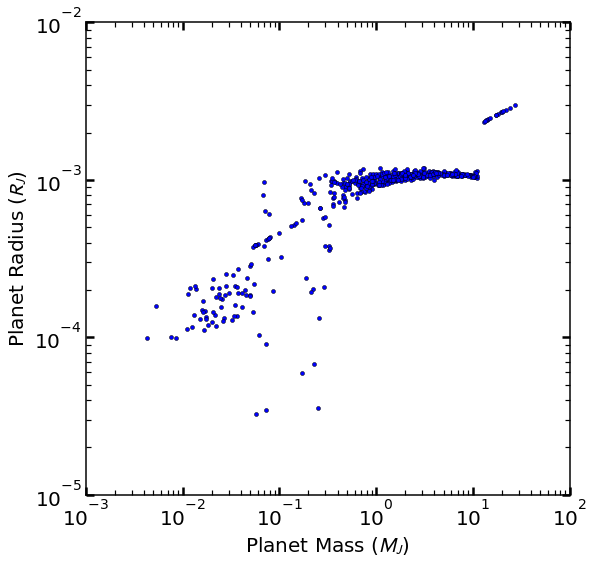

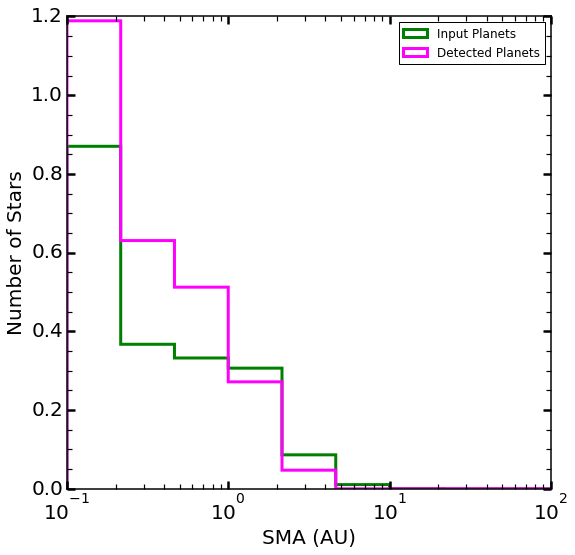

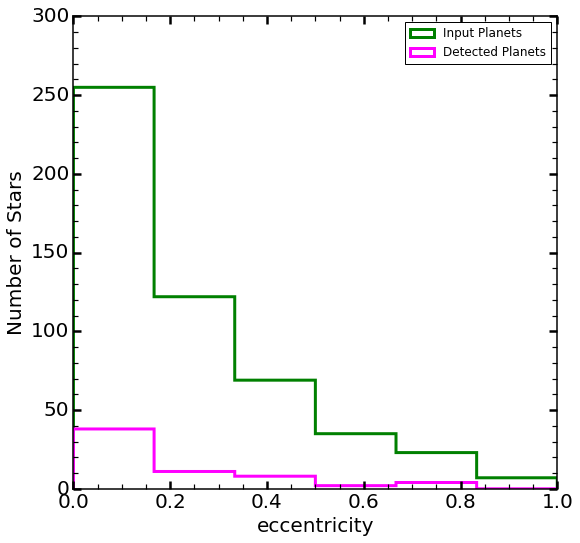

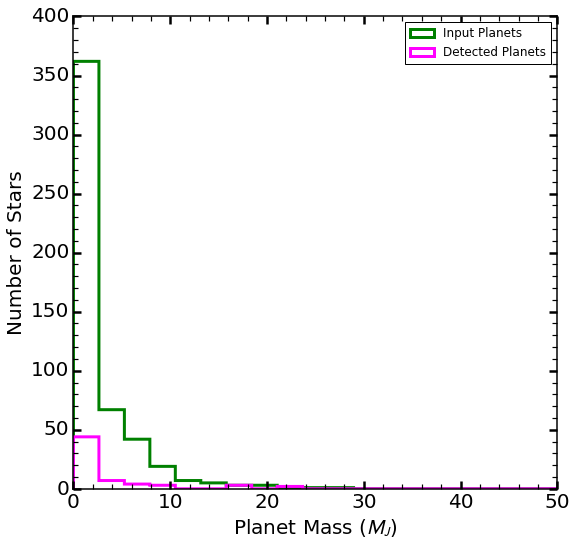

In [110]:
Rj = 69.911e6 #meters
Mj = 1.898e27 #Kg

Mp,Rp = pd_e['Mp'], pd_e['Rp']
sma,ecc = pd_e['sma'], pd_e['e']
ebins = np.linspace(0,1,7)
logarange = np.log10(arange)
smabins = np.logspace(logarange[0],logarange[1],10)
massbins = np.linspace(.001,50,20)
#smabins = np.linspace()


axp = plt.figure(figsize=(8,8)).add_subplot(111)
PT.plot_setup(axp)
axp.plot(Mp/Mj,Rp/Rj,'bo',ms=4)
axp.set_xlabel(r'Planet Mass ($M_J$)',fontsize=20)
axp.set_ylabel(r'Planet Radius ($R_J$)',fontsize=20)
#axp.set_title('%s'%basesim)
plt.loglog()
if save_plots: plt.savefig(os.path.join(dirsave,'planet_R_v_M_%s.png'%basesim))

axps = plt.figure(figsize=(8,8)).add_subplot(111)
PT.plot_setup(axps)
axps.hist(sma,bins=smabins,histtype='step',lw=3,color='green',label='Input Planets',normed=True);
axps.hist(sma[detind_plc],bins=smabins,histtype='step',lw=3,color='magenta',label='Detected Planets',normed=True);
axps.set_xlabel('SMA (AU)',fontsize=20)
axps.set_ylabel('Number of Stars',fontsize=20) 
#axps.set_title('%s'%basesim)
if save_plots: plt.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))
plt.legend()
plt.semilogx()

axe = plt.figure(figsize=(8,8)).add_subplot(111)
PT.plot_setup(axe)
axe.hist(ecc,bins=ebins,histtype='step',lw=3,color='green',label='Input Planets')
axe.hist(ecc[detind_plc],bins=ebins,histtype='step',lw=3,color='magenta',label='Detected Planets');
axe.set_xlabel('eccentricity',fontsize=20)

axe.set_ylabel('Number of Stars',fontsize=20) 
if save_plots: plt.savefig(os.path.join(dirsave,'planet_ecc_distribution_%s.png'%basesim))
plt.legend()


axps = plt.figure(figsize=(8,8)).add_subplot(111)
PT.plot_setup(axps)
axps.hist(Mp/Mj,bins=massbins,histtype='step',lw=3,color='green',label='Input Planets');
axps.hist(Mp[detind_plc]/Mj,bins=massbins,histtype='step',lw=3,color='magenta',label='Detected Planets');
axps.set_xlabel(r'Planet Mass ($M_J$)',fontsize=20)
axps.set_ylabel('Number of Stars',fontsize=20) 
#axps.set_title('%s'%basesim)
if save_plots: plt.savefig(os.path.join(dirsave,'planet_SMA_distribution_%s.png'%basesim))
plt.legend()


